# Accessing NEP descriptors

This tutorial demonstrates the basic functionality available for the analysis of NEP models.
Specifically, the interface exposes convenience functions for calculating per-atom descriptors, energies, forces, virials/stresses, dipoles and latent space representations for [Atoms objects](https://wiki.fysik.dtu.dk/ase/ase/atoms.html).

We start by creating an `Atoms` object, which will serve as our prototype system for the extent of this tutorial, and by importing the `get_descriptors`, `get_potential_forces_and_virials`, `get_dipole` and `get_latent_space` functions from the `calorine.nep` submodule.

In [1]:
from ase.io import read
from ase.build import bulk
import matplotlib.pyplot as plt
from calorine.nep import get_descriptors, \
                         get_potential_forces_and_virials, \
                         get_dipole, \
                         get_latent_space

structure = bulk('PbTe', crystalstructure='rocksalt', a=6.7)

We can now compute the descriptors, energies, forces and virials for our system by calling `get_descriptors` and `get_potential_forces_and_virials`.
To this end, we pass the atomic structure together with the path to a NEP model file.
Here, we use a [NEP3 model for PbTe](https://gitlab.com/brucefan1983/nep-data/-/tree/main/PbTe).

In [2]:
descriptors = get_descriptors(structure, potential_filename='PbTe_NEP3.txt')

per_atom_energies, forces, virials = \
    get_potential_forces_and_virials(structure, potential_filename='PbTe_NEP3.txt')

print(f'Shape of descriptors: {descriptors.shape}')
print(f'Energy (eV):\n {per_atom_energies}')
print(f'Forces (eV/Å):\n {forces}')
print(f'Virials (eV):\n {virials}')

Shape of descriptors: (2, 30)
Energy (eV):
 [-3.81130494 -3.86976582]
Forces (eV/Å):
 [[ 2.70616862e-16  2.85239922e-17 -1.16068684e-16]
 [-2.70616862e-16 -2.85239922e-17  1.16068684e-16]]
Virials (eV):
 [[-7.46565476e-01 -4.36421400e-16 -2.92134080e-17 -4.39890847e-16
  -7.46565476e-01 -1.64798730e-16 -3.61523019e-17 -1.57859836e-16
  -7.46565476e-01]
 [ 3.84050515e-01 -3.23080227e-16  1.94966315e-16 -2.95324651e-16
   3.84050515e-01  9.78218006e-17  1.94966315e-16  9.78218006e-17
   3.84050515e-01]]


`get_descriptors` can also be called without supplying a NEP model file, in which case a dummy NEP2 model will be generated on-the-fly.
The dummy model has all parameter values set to 1.
*Note that this model does not differentiate different atom species.*
Thus, supplying your own trained NEP model file is recommended for most applications. 

In [3]:
descriptors = get_descriptors(structure)
print(f'Shape of descriptors: {descriptors.shape}')

Shape of descriptors: (2, 52)


#### Accessing latent space representations

The latent space representation of a structure can be obtained using the function `get_latent_space`. The latent space is a matrix, with shape `(number_of_atoms, number_of_neurons)` where `number_of_neurons` is the number of neurons in the hidden layer in the neural network.

Shape of latent space: (2, 30)


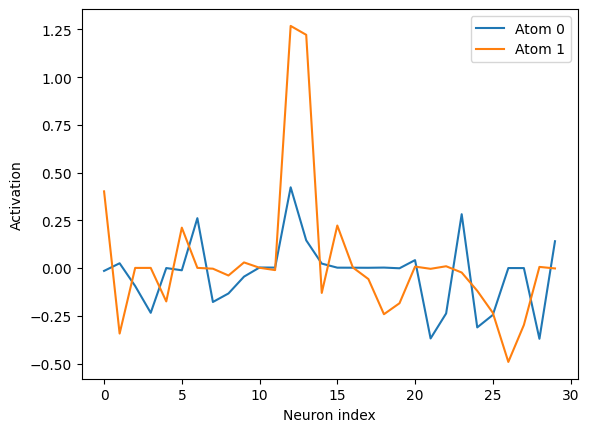

In [4]:
%matplotlib inline
structure = bulk('PbTe', crystalstructure='rocksalt', a=6.7)
latent = get_latent_space(structure, potential_filename='PbTe_NEP3.txt')

print(f'Shape of latent space: {latent.shape}')

fig, ax = plt.subplots()
ax.plot(latent[0,:], label='Atom 0')
ax.plot(latent[1,:], label='Atom 1')
ax.set_xlabel('Neuron index')
ax.set_ylabel('Activation')
ax.legend(loc='best');